In [79]:

%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

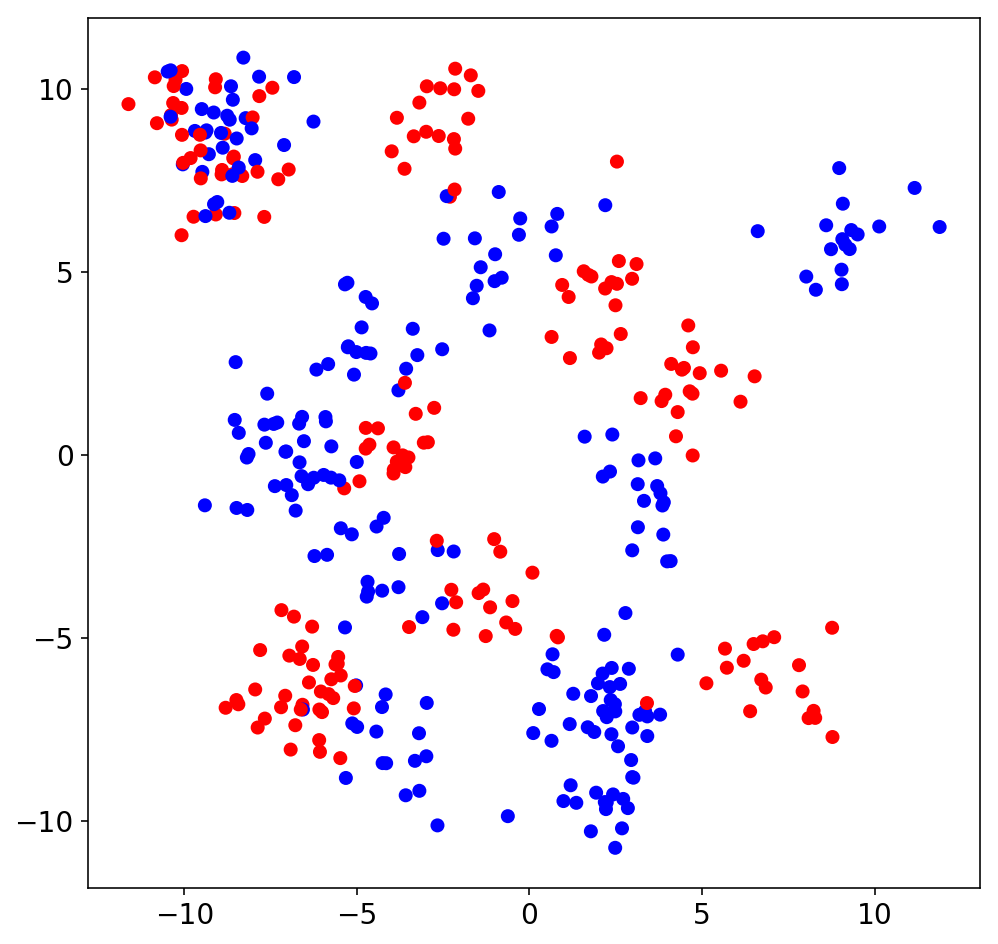

In [80]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

X, y = make_blobs(n_samples=400, centers=23, random_state=42)

labels = ["b", "r"]
y = np.take(labels, (y < 10))

plt.scatter(X[:,0], X[:,1], c=y)

Here is the plot. Then I split the data into two subset in order to test the outsample properties of the model. As we did in the lecture, I use 50% of the dataset to fit the model while the remaining part is used to test the fit.

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Then, the idea is to compare clf.predict(X_test) (which is the color prediction) with y_test (the true color). The appropriate metric is .score which I will use.

In [82]:
print(clf.score(X_test, y_test))
print(clf.score(X_train, y_train))

0.86
0.91


As expected, the in-sample prediction is better than the other.

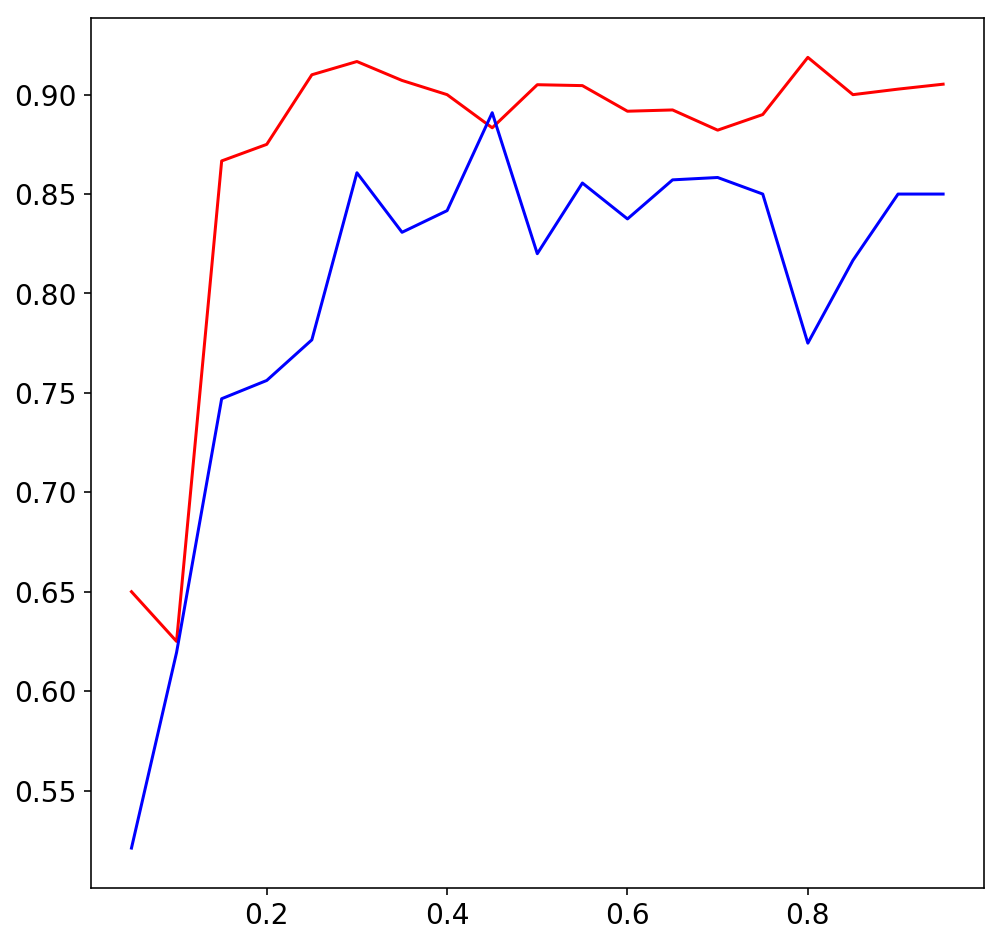

In [95]:
acc_test = []
acc_train = []
indep=[]

for n in range(1,20):
    i=n/20
    indep.append(i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=i)
    clf.fit(X_train, y_train)
    acc_train.append(clf.score(X_train, y_train))
    acc_test.append(clf.score(X_test, y_test))
    
plt.plot(indep, acc_train, '-r')
plt.plot(indep, acc_test, '-b')

The in-sample metric works better than the out-sample; a model will always be better at replicating in-sample data than predicting. More importantly, it seems that, once the size of the train dataset reaches 50%, the fit doesn't change significantly. This suggest that we can use a relatively small amount of data to train the model and keep the other fraction for testing it. In the next figure, I replicate the experiment 50 times and take the average. This confirms the initial intuition.

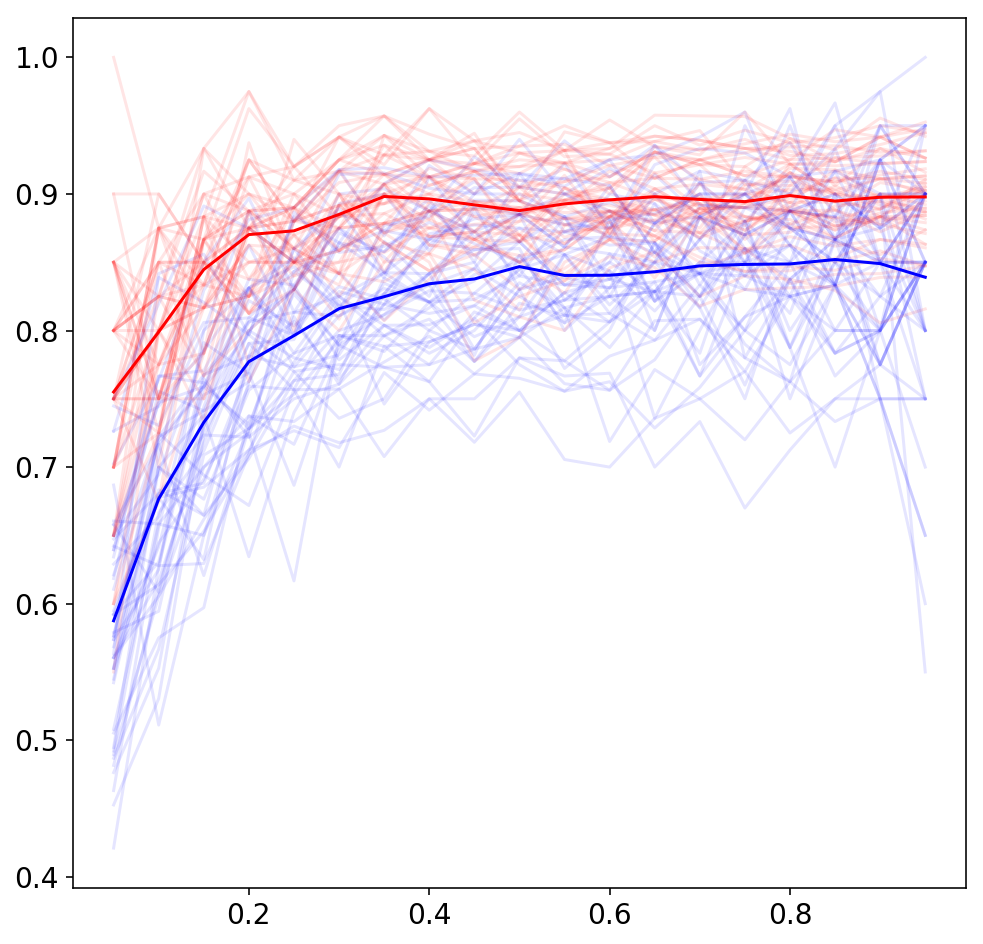

In [98]:
acc_test = []
acc_train = []
ks=[]
for n in range(1,20):
    i=n/20
    ks.append(i)

for n in range(50):
    X, y = make_blobs(n_samples=400, centers=23, random_state=42+n)
    y = np.take(labels, (y<10))
    train_scores = []
    test_scores= []
    for n in range(1,20):
        i=n/20
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=i)
        clf.fit(X_train, y_train)
        train_scores.append(clf.score(X_train, y_train))
        test_scores.append(clf.score(X_test, y_test))
        acc_test.append(test_scores)
        acc_train.append(train_scores)
        

    plt.plot(ks, train_scores, '-r', alpha=0.1)
    plt.plot(ks, test_scores, '-b', alpha=0.1)
      
plt.plot(ks, np.array(acc_test).mean(axis=0), '-b')
plt.plot(ks, np.array(acc_train).mean(axis=0), '-r')

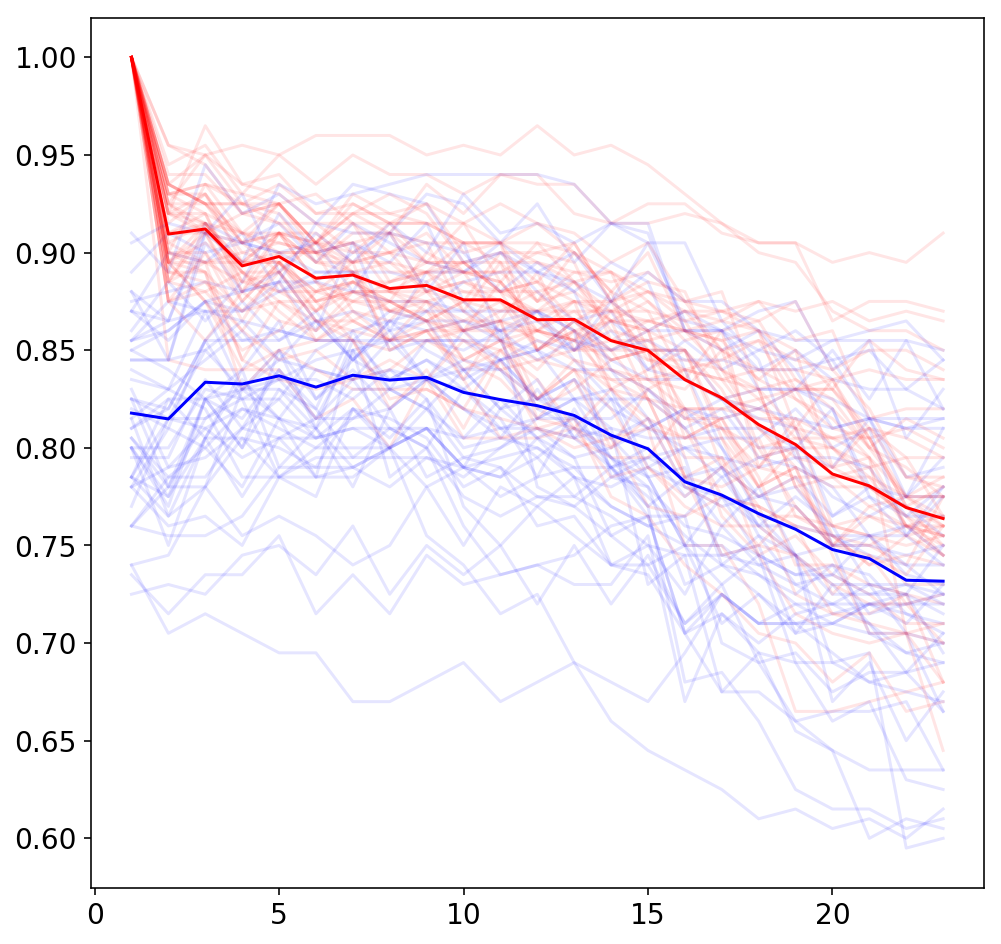

In [99]:
acc_test = []
acc_train = []

for n in range(50):
    X, y = make_blobs(n_samples=400, centers=23, random_state=42+n)
    y = np.take(labels, (y<10))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    train_scores = []
    test_scores= []
    for k in range(1,24):
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_train, y_train)
        train_scores.append(clf.score(X_train, y_train))
        test_scores.append(clf.score(X_test, y_test))
    acc_test.append(test_scores)
    acc_train.append(train_scores)

    plt.plot(range(1,24), train_scores, '-r', alpha=0.1)
    plt.plot(range(1,24), test_scores, '-b', alpha=0.1)
    
ks = range(1,24)
plt.plot(ks, np.array(acc_test).mean(axis=0), '-b')
plt.plot(ks, np.array(acc_train).mean(axis=0), '-r')

The training dataset is (almost) a monotonic decreasing function of the number of neighbors. If one reduces the complexity of the model (use more neighbors), the out-sample properties will improve slightly. However, we one uses significantly more data, the predictive power reverse. A classifier with 4 neighbors is more complex than one with 10, however the provide the same testing power, which suggest the 4th model is better (less costly in data) than the other.
The best setting is the one that maximizes the outsample predictive power. In our case, 7-8 neighbors.